In [45]:
import numpy as np
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf    
import cv2

In [22]:
train_directory="../train2/"
test_directory="../test3/"

def images(image_directory):
    return [image_directory + image  for image in os.listdir(image_directory)]
  
    '''이미지 디렉토리에 있는 리스트를 뽑아주고 주소와 이미지 이름을 같이출력'''



def extract_labels(file_names):
    n=len(file_names)
    y=np.zeros(n,dtype=np.int32)
    
    for i,filename in enumerate(file_names):
        if 'cat'in str(filename):
            y[i]=0
        else:
            y[i]=1
            
    return y

    '''이미지 디렉토리로 부터 리스트에 있는 이름을 추출하여 classification을 해줌, 답안지를 만드는 과정'''
    ''' 고양이라는 이미지에 0을 할당 개에 1할당'''

In [23]:
def img_to_matrix(filename, verbose=False):
        
    
    img = Image.open(filename)
    '''이미지  파일명으로 파일을 불러와서 그걸 rgb픽셀 넘파이로 바꿔주는 작업'''
    if verbose == True:
        print ("Changing size from")
        
    '''verbose는 여기서 프로그램이 잘돌고 있는지 알려준다. 에러나 예를 보여줌'''
    '''디버그 관련한 것을 보여주는 false인 경우 안보여 줘도 된다.'''
    img = img.resize((48,48))
    '''이미지 사이즈를 48, 48로 줄여준다.'''
    
    img = list(img.getdata())
    '''픽셀값을 가지는 시퀀스 객체로 만들어준다.''' 
    img = map(list, img)
    '''리스트로 안에 있는 데이터 값을 맵핑해준다. 캐스팅해준다고 생각하자'''
    img = np.array(img)
    return img

    '''이미지를 리사이즈 하고 그에 따른 값들을 리스트로 캐스팅해줌'''
def flatten_image(img):

    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return img_wide[0]
    '''이미지를 1차원으로 펴주는 작업'''


In [24]:
train_image_names=images(train_directory)

In [29]:
y_train=extract_labels(train_image_names)

In [25]:
train_image_names

['../train2/cat.0.jpg',
 '../train2/cat.1.jpg',
 '../train2/cat.10.jpg',
 '../train2/cat.100.jpg',
 '../train2/cat.1000.jpg',
 '../train2/cat.101.jpg',
 '../train2/cat.102.jpg',
 '../train2/cat.103.jpg',
 '../train2/cat.104.jpg',
 '../train2/cat.105.jpg',
 '../train2/cat.106.jpg',
 '../train2/cat.107.jpg',
 '../train2/cat.108.jpg',
 '../train2/cat.109.jpg',
 '../train2/cat.11.jpg',
 '../train2/cat.110.jpg',
 '../train2/cat.111.jpg',
 '../train2/cat.112.jpg',
 '../train2/cat.113.jpg',
 '../train2/cat.114.jpg',
 '../train2/cat.115.jpg',
 '../train2/cat.116.jpg',
 '../train2/cat.117.jpg',
 '../train2/cat.118.jpg',
 '../train2/cat.119.jpg',
 '../train2/cat.12.jpg',
 '../train2/cat.120.jpg',
 '../train2/cat.121.jpg',
 '../train2/cat.122.jpg',
 '../train2/cat.123.jpg',
 '../train2/cat.124.jpg',
 '../train2/cat.125.jpg',
 '../train2/cat.126.jpg',
 '../train2/cat.127.jpg',
 '../train2/cat.128.jpg',
 '../train2/cat.129.jpg',
 '../train2/cat.13.jpg',
 '../train2/cat.130.jpg',
 '../train2/cat.131

In [4]:
train_image_names=images(train_directory)
'''트레인 이미지에서 이름을 리스트로 뽑는작업'''
y_train=extract_labels(train_image_names)
'''트레인 이미지로 부터 y label을 할당하는 작업'''
np.save('y_train',y_train)

'''여기까지 y_train 준비!!'''


x_train=[]

for i in images(train_directory): 
    img=img_to_matrix(i)
    img=flatten_image(img)
    x_train.append(img)
'''x_train 준비'''    
    



'x_train \xec\xa4\x80\xeb\xb9\x84'

In [38]:
test_image_names=images(test_directory) 

In [37]:
test_image_names=images(test_directory) 

y_test=extract_labels(test_image_names)
np.save('y_test',y_test)



test_images=images(test_directory)

x_test = [ ]
for i in test_images:
    img = img_to_matrix(i)
    img = flatten_image(img)
    x_test.append(img)

x_test = np.array(x_test)
x_test.shape

(800, 6912)

In [6]:
from sklearn.svm import SVC
svc_1=SVC(kernel='linear').fit(x_train,y_train)

In [7]:
svc_predict=svc_1.predict(x_test)

In [8]:
svc_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0,

In [9]:
 from sklearn.metrics import classification_report
print (classification_report(y_test,svc_predict))

             precision    recall  f1-score   support

          0       0.54      0.56      0.55       400
          1       0.54      0.52      0.53       400

avg / total       0.54      0.54      0.54       800



In [10]:
from sklearn.svm import SVC
model2=SVC(kernel="linear").fit(x_train,y_train)

In [13]:
svm_predict=model2.predict(x_test)

In [14]:
 from sklearn.metrics import classification_report
print (classification_report(y_test,svm_predict))

             precision    recall  f1-score   support

          0       0.54      0.56      0.55       400
          1       0.54      0.52      0.53       400

avg / total       0.54      0.54      0.54       800



Resize each image

convert to gray scale

find PCA

flat that and append it to training list

append labels to training labels


In [30]:
training_set=[]


for file in train_image_names:
    img = cv2.imread(file)
    res=cv2.resize(img,(64,64))
    gray_image = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    xarr=np.squeeze(np.array(gray_image).astype(np.float32))
    m,v=cv2.PCACompute(xarr)
    arr= np.array(v)
    flat_arr= arr.ravel()
    training_set.append(flat_arr)
   



In [31]:
training_set

[array([ 0.01470304,  0.01784864,  0.02215895, ...,  0.12653257,
        -0.13886732,  0.08333451], dtype=float32),
 array([ 0.05560311,  0.07592809,  0.08648504, ...,  0.11355577,
        -0.11929061, -0.04267014], dtype=float32),
 array([-0.14019454, -0.1337492 , -0.13216452, ..., -0.17449398,
         0.14606604, -0.07204343], dtype=float32),
 array([-0.04332779, -0.05289512, -0.07034308, ...,  0.10542297,
        -0.0018027 , -0.22154164], dtype=float32),
 array([-0.0281037 , -0.04472289, -0.02270325, ..., -0.13683997,
        -0.01208275,  0.02128489], dtype=float32),
 array([ 0.02315766,  0.03348199,  0.04379634, ..., -0.0405571 ,
        -0.10840967,  0.00147137], dtype=float32),
 array([ 0.18190029,  0.1801959 ,  0.18196681, ...,  0.00745126,
         0.0010075 ,  0.0351416 ], dtype=float32),
 array([ 0.03491415,  0.034021  ,  0.03582906, ..., -0.10142352,
        -0.48672855,  0.25555944], dtype=float32),
 array([ 0.1990201 ,  0.19834514,  0.1945236 , ..., -0.10812461,
       

In [33]:
traindata=np.float32(training_set)

svm = cv2.SVM()
svm.train(trainData,y_train, params=svm_params)


NameError: name 'svm_params' is not defined

In [34]:
traindata=np.float32(training_set)

from sklearn.svm import SVC
model2=SVC(kernel="linear").fit(traindata,y_train)



In [35]:
svm_predict=model2.predict(traindata)

In [36]:
 from sklearn.metrics import classification_report
print (classification_report(y_train,svm_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1000
          1       1.00      1.00      1.00      1000

avg / total       1.00      1.00      1.00      2000



In [39]:
test_set=[]


for file in test_image_names:
    img = cv2.imread(file)
    res=cv2.resize(img,(64,64))
    gray_image = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    xarr=np.squeeze(np.array(gray_image).astype(np.float32))
    m,v=cv2.PCACompute(xarr)
    arr= np.array(v)
    flat_arr= arr.ravel()
    test_set.append(flat_arr)
   



In [41]:
svm_predict=model2.predict(test_set)

In [43]:
 from sklearn.metrics import classification_report
print (classification_report(y_test,svm_predict))

             precision    recall  f1-score   support

          0       0.52      0.48      0.50       400
          1       0.51      0.55      0.53       400

avg / total       0.52      0.52      0.51       800



In [46]:
svm_predict


array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0,

In [47]:
param_range = np.logspace(-6, -1, 10)

In [50]:
from sklearn.learning_curve import validation_curve

train_scores, test_scores = \ 
    validation_curve(SVC(), traindata, y_train, 
                     param_name="gamma", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=1)

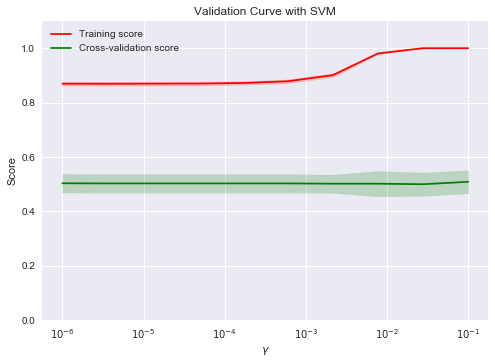

In [51]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC



param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
model3=Ridge()
gs = GridSearchCV(estimator=model3    , param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=1)
%time 

In [ ]:
gs = gs.fit(X, y)